In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist

In [3]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [4]:
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

X_train = X_train_full[5000:]
y_train = y_train_full[5000:]

In [5]:
del(X_train_full, y_train_full)

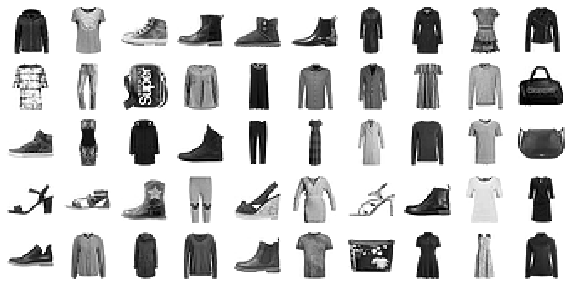

In [6]:
plt.figure(figsize = (10, 5))

for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i], cmap = 'gray_r', interpolation = 'nearest')
    plt.axis(False)
plt.show()

In [7]:
model = keras.models.Sequential()

model.add(keras.layers.Flatten(input_shape = [28, 28]))
model.add(keras.layers.Dense(300, activation = 'relu'))
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dense(10, activation = 'softmax'))

In [8]:
model.layers

In [9]:
print('Layer name \t Input shape \t Output shape')
print('=========================================')
for layer in model.layers:
    print(layer.name, '\t', layer.input_shape, '\t', layer.output_shape)

Layer name 	 Input shape 	 Output shape
flatten 	 (None, 28, 28) 	 (None, 784)
dense 	 (None, 784) 	 (None, 300)
dense_1 	 (None, 300) 	 (None, 100)
dense_2 	 (None, 100) 	 (None, 10)


In [10]:
weight, bias = model.get_layer('dense_1').weights

In [11]:
weight

<tf.Variable 'dense_1/kernel:0' shape=(300, 100) dtype=float32, numpy=
array([[-0.05138072, -0.10056236, -0.05361339, ...,  0.10672673,
         0.09691299,  0.01818991],
       [ 0.06481401, -0.08799957, -0.11352261, ..., -0.10477643,
        -0.06941335, -0.0852097 ],
       [ 0.01999413,  0.04103126,  0.12060573, ..., -0.090306  ,
        -0.0241141 , -0.02301189],
       ...,
       [-0.04162055, -0.06669374,  0.030785  , ...,  0.06576876,
         0.11443304, -0.01372339],
       [ 0.0647478 ,  0.04948451,  0.05148315, ..., -0.04536919,
         0.09351473,  0.10762385],
       [ 0.00994989,  0.00485856, -0.11232949, ...,  0.11100132,
         0.04312422, -0.07141395]], dtype=float32)>

In [12]:
weight.shape

TensorShape([300, 100])

In [13]:
bias

<tf.Variable 'dense_1/bias:0' shape=(100,) dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
      dtype=float32)>

In [14]:
bias.shape

TensorShape([100])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


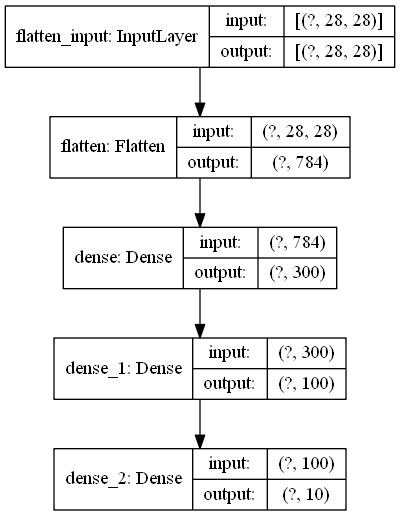

In [16]:
keras.utils.plot_model(model, show_layer_names = True, show_shapes = True)

In [17]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = keras.optimizers.SGD(0.001),
             metrics = ['accuracy'])

In [18]:
checkpoint_cb = keras.callbacks.ModelCheckpoint('fashion_mnist_model.h5')

In [19]:
earlystopping_cb = keras.callbacks.EarlyStopping(patience = 5, restore_best_weights = True)

In [20]:
history = model.fit(X_train, y_train, epochs = 50, validation_data = [X_valid, y_valid],
                   callbacks = [checkpoint_cb, earlystopping_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/50
55000/55000 [==============================] - 4s 78us/sample - loss: 2.3420 - accuracy: 0.6987 - val_loss: 0.6285 - val_accuracy: 0.7684
Epoch 2/50
55000/55000 [==============================] - 4s 71us/sample - loss: 0.5971 - accuracy: 0.7736 - val_loss: 0.5652 - val_accuracy: 0.7888
Epoch 3/50
55000/55000 [==============================] - 4s 70us/sample - loss: 0.5243 - accuracy: 0.8023 - val_loss: 0.4996 - val_accuracy: 0.8264
Epoch 4/50
55000/55000 [==============================] - 5s 86us/sample - loss: 0.4754 - accuracy: 0.8257 - val_loss: 0.4832 - val_accuracy: 0.8370
Epoch 5/50
55000/55000 [==============================] - 5s 84us/sample - loss: 0.4414 - accuracy: 0.8376 - val_loss: 0.4601 - val_accuracy: 0.8436
Epoch 6/50
55000/55000 [==============================] - 5s 86us/sample - loss: 0.4159 - accuracy: 0.8479 - val_loss: 0.4714 - val_accuracy: 0.8412
Epoch 7/50
55000/55000 [==============================] -

In [21]:
import pandas as pd

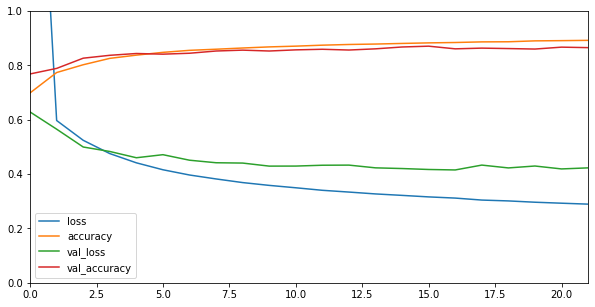

In [25]:
pd.DataFrame(history.history).plot(figsize = (10, 5))
plt.gca().set_ylim(0, 1)
plt.show()

In [26]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 0s 41us/sample - loss: 0.4431 - accuracy: 0.8524s - loss: 0.4579 - accuracy


[0.44306482429504396, 0.8524]

In [34]:
input_A = keras.layers.Input(shape = [5])
input_B = keras.layers.Input(shape = [5])
dense_1 = keras.layers.Dense(30, activation = 'relu')(input_B)
dense_2 = keras.layers.Dense(10, activation = 'relu')(dense_1)
concat = keras.layers.concatenate([input_A, dense_2])
output = keras.layers.Dense(1)(concat)
aux_output = keras.layers.Dense(1)(dense_2)

In [36]:
model = keras.models.Model(inputs = [input_A, input_B], outputs = [output, aux_output])

In [37]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_15 (Dense)                (None, 30)           180         input_12[0][0]                   
__________________________________________________________________________________________________
input_11 (InputLayer)           [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_16 (Dense)                (None, 10)           310         dense_15[0][0]                   
____________________________________________________________________________________________

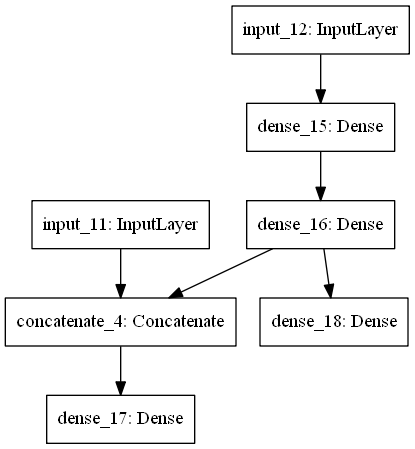

In [38]:
keras.utils.plot_model(model)